# Analyzing Super Store: Uncovering Insights through Data Exploration

## Introduction

Super Store is a little shop in Canada that sells furniture, office supplies, and technology products to regular consumers, businesses, and home offices. The information we have includes details about sales, profits, and the location of each order. 

Our goal is to find out where Super Store can improve and identify chances for the business to grow.

**Business Questions**

- Which Category is Best Selling and Most Profitable?
- What are the Best Selling and Most Profitable Sub-Category?
- Which is the Top Selling Sub-Category?
- Which Customer Segment is Most Profitable?
- Which is the Preferred Ship Mode?
- Which Region is the Most Profitable?
- Which City has the Highest Number of Sales?

**Who is Reading this Analysis?**

- We assume Super Store is a family business with 1 or 2 owners really into it. These owners might not be great at reading charts or complex stats, so we will keep our analysis simple.

- Our goal is to give the owners easy-to-understand info to help them make smart choices for boosting business money. We will focus on finding where things can get better and suggest ideas and ways to sell more.

---

## Preparing the Environment

We will import the necessary libraries and load the data set.

- Pandas - Data manipulation
- Matplotlib and Seaborn - Data visualisation

In [1]:
# Import libraries and create aliases
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
# Load the data in CSV format
superstore = pd.read_csv('SampleSuperstore.csv')

---
## Data Exploration

Let's examine the data by using the df.head() and df.tail() functions.

In [3]:
# First 5 rows of the dataset
superstore.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
# Last 5 rows of the dataset
superstore.tail()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200
9993,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,243.160,2,0.0,72.9480


It's apparent that we have a mix of categorical, geographical, and numerical variables in the dataset.

Each row signifies an order for an item, including details like quantity, sales, discount, and profit. Additionally, information about the shipment mode, customer segment, and geographical aspects is provided.

For further insights, we'll utilize df.shape() and df.info().

In [5]:
# Size of the dataset
superstore.shape

(9994, 13)

In [6]:
# Overview of dataset information
superstore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


The dataset consists of 9,994 rows, including the header, and comprises 13 columns. The data types are accurate and align with their respective values.

----

## Data Cleaning

Before delving into the analysis, it's crucial to clean the data or "scrub the dirt." 

In this analysis, we'll address common issues like missing and duplicate data.

**Handling Missing Values**

Our initial step is to identify whether there are any null values in the dataset.

In [7]:
# Determine the number of null values for each column
superstore.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

The result indicates that the dataset doesn't contain any null values.

**Duplicate Data**

Next, we'll investigate whether there is any duplicated data in the dataset.

In [8]:
# Determine the number of duplicate rows
superstore.duplicated().sum()

17

There are 17 rows with duplicated values. Let's execute another function to inspect these duplicated data.

In [9]:
# Display the duplicated rows
superstore[superstore.duplicated(keep = 'last')]

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
568,Standard Class,Corporate,United States,Seattle,Washington,98105,West,Office Supplies,Paper,19.440,3,0.0,9.3312
591,Standard Class,Consumer,United States,Salem,Oregon,97301,West,Office Supplies,Paper,10.368,2,0.2,3.6288
935,Standard Class,Home Office,United States,Philadelphia,Pennsylvania,19120,East,Office Supplies,Paper,15.552,3,0.2,5.4432
1186,Standard Class,Corporate,United States,Seattle,Washington,98103,West,Office Supplies,Paper,25.920,4,0.0,12.4416
1479,Standard Class,Consumer,United States,San Francisco,California,94122,West,Office Supplies,Paper,25.920,4,0.0,12.4416
2803,Standard Class,Consumer,United States,San Francisco,California,94122,West,Office Supplies,Paper,12.840,3,0.0,5.7780
2807,Second Class,Consumer,United States,Seattle,Washington,98115,West,Office Supplies,Paper,12.960,2,0.0,6.2208
2836,Standard Class,Consumer,United States,Los Angeles,California,90036,West,Office Supplies,Paper,19.440,3,0.0,9.3312
3127,Standard Class,Consumer,United States,New York City,New York,10011,East,Office Supplies,Paper,49.120,4,0.0,23.0864
3405,Standard Class,Home Office,United States,Columbus,Ohio,43229,East,Furniture,Chairs,281.372,2,0.3,-12.0588


Next, we'll use the drop_duplicates() function to eliminate the duplicated rows.

In [10]:
# Remove duplicated rows
superstore.drop_duplicates(inplace = True)

In [11]:
# Determine the number of rows and columns
superstore.shape

(9977, 13)

With the removal of duplicated rows, the dataset now consists of 9977 rows instead of the original 9993.

**Calculated Field**

Moving forward, let's create a calculated field for Profit Margin using the formula $\(Profit \ / \ Sales)\times 100\$.

In [12]:
#  Calculate and add Profit Margin
superstore['Profit Margin %'] = (superstore.Profit / superstore.Sales) * 100
superstore.head(5)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Profit Margin %
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136,16.00
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820,30.00
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714,47.00
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310,-40.00
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164,11.25


Now that the dataset has been cleaned, let's proceed with some statistical analysis!

---

## Descriptive Statistics

For a comprehensive descriptive statistical analysis, we'll use df.describe() and set 'include = 'all' to gain insights into the data's spread, central location, and any potential outliers

In [13]:
# Display a statistic overview for the dataset
superstore.describe(include = 'all')

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Profit Margin %
count,9977,9977,9977,9977,9977,9977.000000,9977,9977,9977,9977.000000,9977.000000,9977.000000,9977.00000,9977.000000
unique,4,3,1,531,49,NaN,4,3,17,NaN,NaN,NaN,NaN,NaN
top,Standard Class,Consumer,United States,New York City,California,NaN,West,Office Supplies,Binders,NaN,NaN,NaN,NaN,NaN
freq,5955,5183,9977,914,1996,NaN,3193,6012,1522,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,55154.964117,NaN,NaN,NaN,230.148902,3.790719,0.156278,28.69013,12.011354
std,NaN,NaN,NaN,NaN,NaN,32058.266816,NaN,NaN,NaN,623.721409,2.226657,0.206455,234.45784,46.663769
min,NaN,NaN,NaN,NaN,NaN,1040.000000,NaN,NaN,NaN,0.444000,1.000000,0.000000,-6599.97800,-275.000000
25%,NaN,NaN,NaN,NaN,NaN,23223.000000,NaN,NaN,NaN,17.300000,2.000000,0.000000,1.72620,7.500000
50%,NaN,NaN,NaN,NaN,NaN,55901.000000,NaN,NaN,NaN,54.816000,3.000000,0.200000,8.67100,27.000000
75%,NaN,NaN,NaN,NaN,NaN,90008.000000,NaN,NaN,NaN,209.970000,5.000000,0.200000,29.37200,36.250000


You may observe 'NaN' values in certain categorical columns, and that's completely acceptable. Categorical values are not intended for calculations, so we can disregard them.

Our attention is directed towards understanding the unique count and frequency of categorical features. For instance:

- There are 4 ship modes and 3 customer segments. Nearly half of the orders are from Consumer segment using Standard Class shipment.

- The store carries 3 category of items with 17 sub-category. 60% of orders are for Office Supplies and at least 15% purchases are for Binders.

Turning to numerical parameters, it's noteworthy that:

- 75% of orders makes at least 36% profit margin.
- Loss-making orders can go up to 275% losses. We must place emphasis on these loss-making sales to cut them off.

We'll proceed with more analyses below to assess these observations.

---

## Exploratory Data Analysis

### 1. Which Category is Best Selling and Most Profitable?

Identifying "Best Selling" involves examining sales, while "Most Profitable" pertains specifically to profit. To aggregate total values of sales, profit, and quantity for each category, we'll use the df.groupby().sum() function.

In [14]:
# Summerize sales, profit, and quantity by category
category_analysis = pd.DataFrame(superstore.groupby(['Category'])[['Sales', 'Profit', 'Quantity']].sum())
category_analysis

,Sales,Profit,Quantity
Category,,,
Furniture,741306.3133,18421.8137,8020
Office Supplies,718735.2440,122364.6608,22861
Technology,836154.0330,145454.9481,6939


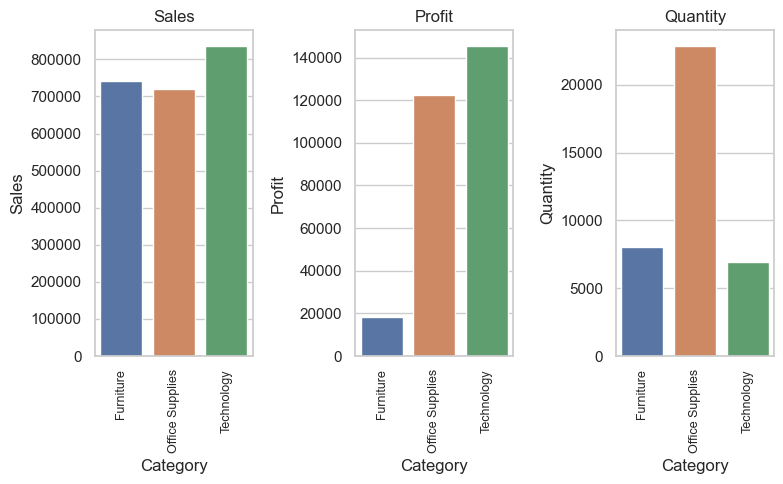

In [15]:
#Customize plots: whitegrid theme, 1x3 subplot grid, 8x5 figure
sns.set_theme(style = 'whitegrid')
figure, axis = plt.subplots(1, 3, figsize = (8, 5))

# Create barplots
cat1 = sns.barplot(x = category_analysis.index, y = category_analysis.Sales, ax = axis[0])
cat2 = sns.barplot(x = category_analysis.index, y = category_analysis.Profit, ax = axis[1])
cat3 = sns.barplot(x = category_analysis.index, y = category_analysis.Quantity, ax = axis[2])

# Set titles
cat1.set(title = 'Sales')
cat2.set(title = 'Profit')
cat3.set(title = 'Quantity')

# Rotate x - axis labels, set font size
plt.setp(cat1.get_xticklabels(), rotation = 'vertical', size = 9)
plt.setp(cat2.get_xticklabels(), rotation = 'vertical', size = 9)
plt.setp(cat3.get_xticklabels(), rotation = 'vertical', size = 9)

# Adjust subplot spacing
figure.tight_layout()

Key findings include:

- Furniture, Office Supplies, and Technology all show similar sales figures.

- Technology stands out as the Best Selling category and is notably the Most Profitable as well. Despite its minimal sales volume, this category represents one-off purchases with an extended lifespan of at least 4-5 years.

- While Furniture matches Technology in sales, it ranks as the least profitable, with minimal quantities sold.

- Office Supplies takes the lead in terms of quantity sold, thanks to its relatively affordable nature.

### 2. What are the Best Selling and Most Profitable Sub-Category?

In [16]:
# Summerize sales and profit by sub-category
subcat_analysis = pd.DataFrame(superstore.groupby(['Sub-Category'])[['Sales', 'Profit']].sum())

In [17]:
# Sort in descending order based on sales
subcat_sales = pd.DataFrame(subcat_analysis.sort_values('Sales', ascending = False))
subcat_sales

,Sales,Profit
Sub-Category,,
Phones,330007.0540,44515.7306
Chairs,327777.7610,26567.1278
Storage,223843.6080,21278.8264
Tables,206965.5320,-17725.4811
Binders,203409.1690,30228.0003
Machines,189238.6310,3384.7569
Accessories,167380.3180,41936.6357
Copiers,149528.0300,55617.8249
Bookcases,114879.9963,-3472.5560


In [18]:
# Sort in descending order based on profit
subcat_profit = pd.DataFrame(subcat_analysis.sort_values('Profit', ascending = False))
subcat_profit

,Sales,Profit
Sub-Category,,
Copiers,149528.0300,55617.8249
Phones,330007.0540,44515.7306
Accessories,167380.3180,41936.6357
Paper,78224.1420,33944.2395
Binders,203409.1690,30228.0003
Chairs,327777.7610,26567.1278
Storage,223843.6080,21278.8264
Appliances,107532.1610,18138.0054
Furnishings,91683.0240,13052.7230


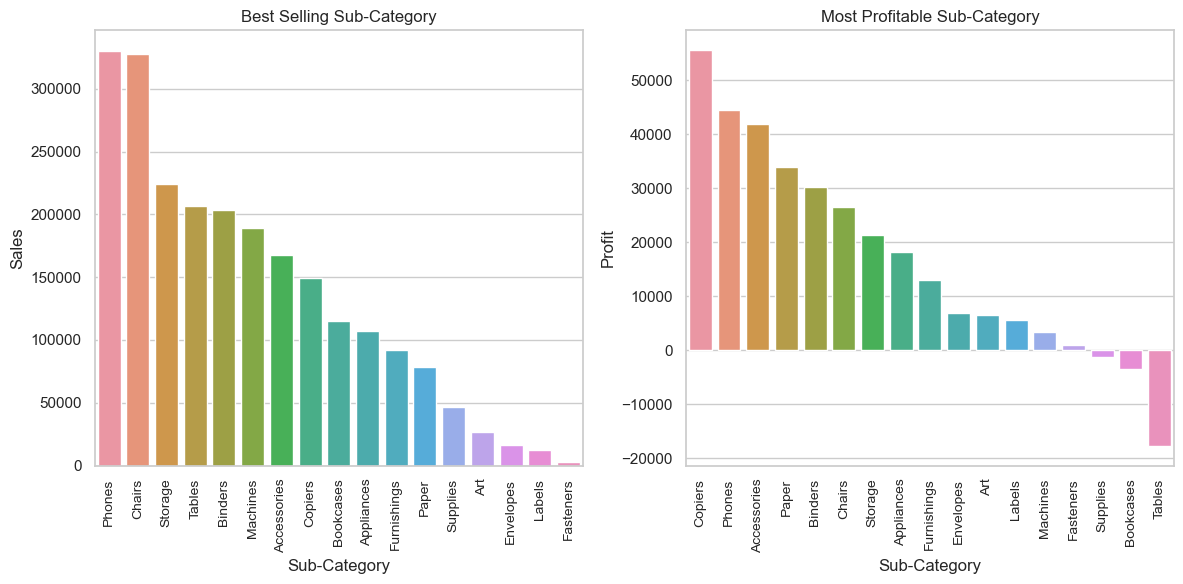

In [19]:
# Customize plots: whitegrid theme, 1x2 subplot grid, 12x6 figure
sns.set_theme(style = 'whitegrid')
figure, axis = plt.subplots(1, 2, figsize = (12, 6))

# Create bar plot for Best Selling Sub-Category
subcat1 = sns.barplot(data = subcat_sales, x = subcat_sales.index, y = subcat_sales.Sales, ax = axis[0])
subcat1.set(title = "Best Selling Sub-Category")
subcat1.set_xticklabels(subcat1.get_xticklabels(),rotation = 'vertical', size = 10)

# Create bar plot for Most Profitable Sub-Category
subcat2 = sns.barplot(data = subcat_profit, x = subcat_profit.index, y = subcat_profit.Profit, ax = axis[1])
subcat2.set(title = "Most Profitable Sub-Category")
subcat2.set_xticklabels(subcat2.get_xticklabels(),rotation = 'vertical', size = 10)

# Adjust subplot spacing
figure.tight_layout()
plt.show()

Key findings include:

- Phones and Chairs emerge as the top two best-selling sub-categories.

- Copiers generate the highest profit, followed by Phones, Accessories, Papers, and Binders. Crafting an effective marketing strategy should prioritize these products.

- Conversely, Machines, Fasteners, Supplies, Bookcases, and Tables exhibit marginal to negative margins. Considerations for the Super Store could involve discontinuing these products, adjusting sale prices, optimizing profit margins, or negotiating lower costs with suppliers.

### 3. Which is the Top Selling Sub-Category?

In [20]:
# Summarize quantity by sub-category
subcat_quantity = pd.DataFrame(superstore.groupby(['Sub-Category'])[['Quantity']].sum())

# Sort in descending order of sales
subcat_quantity = pd.DataFrame(subcat_quantity.sort_values('Quantity',ascending = False))
subcat_quantity

,Quantity
Sub-Category,
Binders,5971
Paper,5144
Furnishings,3560
Phones,3289
Storage,3158
Art,2996
Accessories,2976
Chairs,2351
Appliances,1729


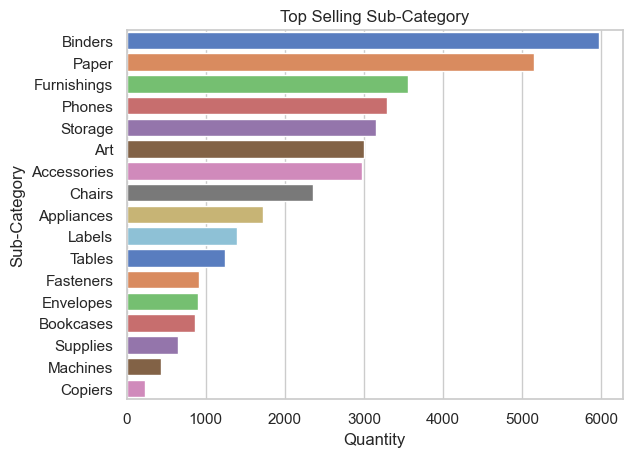

In [21]:
# Create bar plot for Top Selling Sub-Category
sns.set_theme(style = 'whitegrid')
sns.barplot(data = subcat_quantity, y = subcat_quantity.index, x = subcat_quantity.Quantity, palette = 'muted')
plt.title("Top Selling Sub-Category")
plt.show()

Key findings include:

- It's crucial for Super Store to maintain consistently well-stocked inventory for the top-selling sub-categories like Binders, Paper, Furnishings, and Phones.

- Despite being the most profitable, Copiers have a lower sales volume, totaling only 234. Given their higher price and the fact that they are typically utilized for several years, it's reasonable that they have a lower sales frequency compared to other products.

### 4. Which Customer Segment is Most Profitable?

In [22]:
# Summarize profit by customer segment
segment_analysis = pd.DataFrame(superstore.groupby(['Segment'])[['Profit']].sum())
segment_analysis

,Profit
Segment,
Consumer,134007.4413
Corporate,91954.9798
Home Office,60279.0015


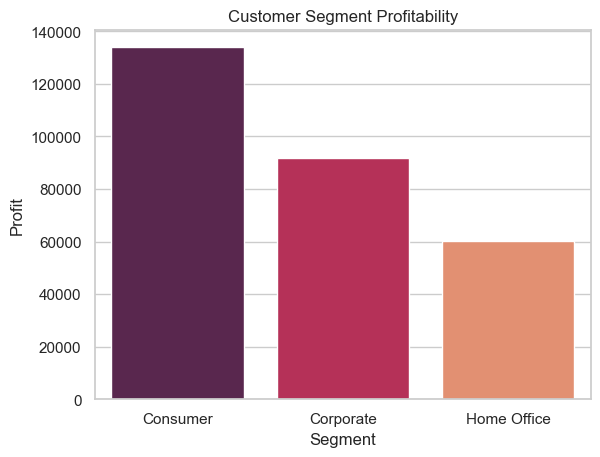

In [23]:
# Create bar plot for Most Profitable Customer Segment
sns.set_theme(style = 'whitegrid')
sns.barplot(data = segment_analysis, x = segment_analysis.index, y = segment_analysis.Profit, palette = 'rocket')
plt.title("Customer Segment Profitability")

plt.show()

The Consumer segment stands out as the most profitable, followed by the Corporate Segment and Home Office. Consequently, the marketing strategy should prioritize efforts on retaining Consumer and Corporate Segment customers.

### 5. Which is the Preferred Ship Mode?

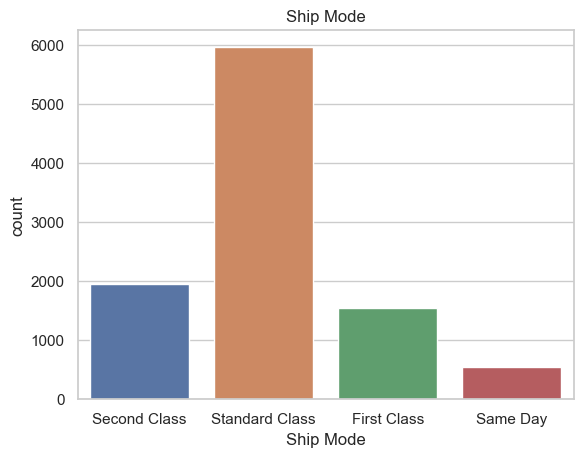

In [24]:
# Create bar plot for Preferred Ship Mode
sns.set_theme(style = 'whitegrid')
sns.countplot(data = superstore, x = 'Ship Mode')
plt.title("Ship Mode")
plt.show()

Standard Class overwhelmingly emerges as the preferred and potentially the most cost-effective shipment method. The other modes appear less favored among customers, possibly due to higher associated costs.

### 6. Which Region is the Most Profitable?

In [25]:
# Summarize profit by region
region_analysis = pd.DataFrame(superstore.groupby(['Region'])['Profit'].sum().reset_index())
region_analysis

,Region,Profit
0,Central,39655.8752
1,East,91506.3092
2,South,46749.4303
3,West,108329.8079


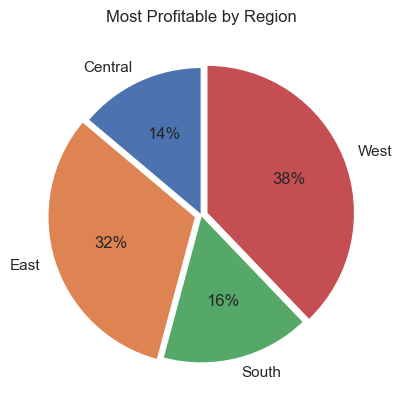

In [26]:
# Create pie chart for Most Profitable Region
explode = [0, 0.04, 0, 0.04]
plt.pie(region_analysis.Profit, labels = region_analysis.Region, startangle = 90, autopct = "%1.0f%%", explode = explode)
plt.title("Most Profitable by Region")
plt.show()

The East and West regions demonstrate the highest profitability.

### 7. Which City has the Highest Number of Sales?

In [27]:
# Summarize sales and quantity by city
city_sales = pd.DataFrame(superstore.groupby(['City'])[['Sales', 'Quantity']].sum())

# Sort in descending order of sales                          
city_sales = pd.DataFrame(city_sales.sort_values('Sales', ascending = False))

# Identify the top 10 cities with the highest sales                        
top10 = city_sales[:10]
top10

,Sales,Quantity
City,,
New York City,256319.0410,3413
Los Angeles,175831.9010,2876
Seattle,119460.2820,1578
San Francisco,112577.1720,1920
Philadelphia,109061.4610,1978
Houston,64441.2564,1460
Chicago,48535.9770,1129
San Diego,47521.0290,670
Jacksonville,44713.1830,429


In [28]:
# Identify the top 10 cities with the lowest sales   
bottom10 = city_sales[-10:]
bottom10

,Sales,Quantity
City,,
Missouri City,6.370,7
Keller,6.000,2
Layton,4.960,4
Springdale,4.300,2
San Luis Obispo,3.620,2
Ormond Beach,2.808,3
Pensacola,2.214,3
Jupiter,2.064,1
Elyria,1.824,1


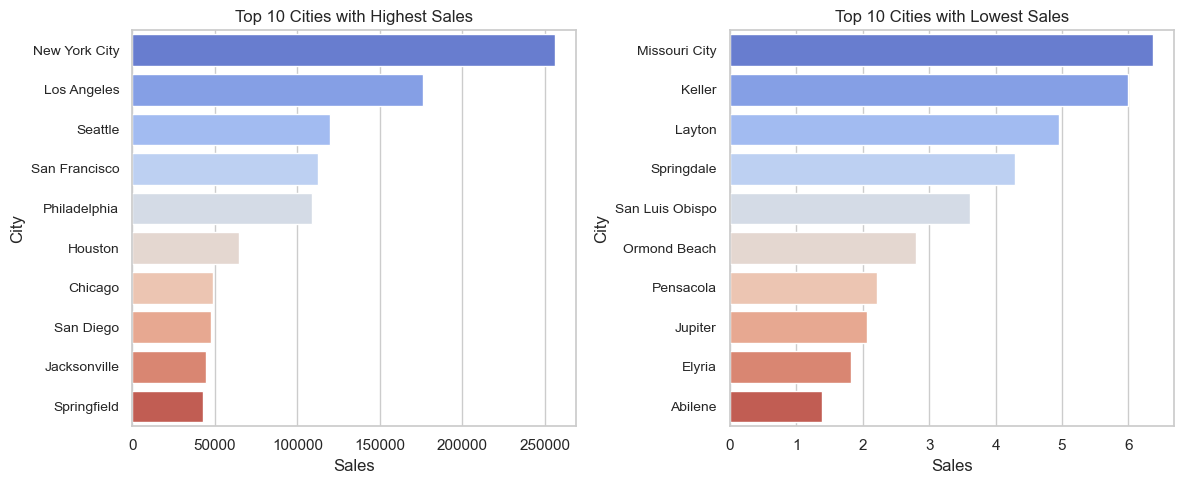

In [29]:
# Customize plots: whitegrid theme, 1x2 subplot grid, 12x5 figure
sns.set_theme(style = 'whitegrid')
figure, axis = plt.subplots(1, 2, figsize = (12, 5))

# Create bar plot for Best Selling Sub-Category
top10c = sns.barplot(data = top10, y = top10.index, x = top10.Sales, palette = 'coolwarm', ax = axis[0])
top10c.set(title = "Top 10 Cities with Highest Sales")
top10c.set_yticklabels(top10c.get_yticklabels(), size = 10)

# Create bar plot for Worst Selling Sub-Category
bottom10c = sns.barplot(data = bottom10, y = bottom10.index, x = bottom10.Sales, palette = 'coolwarm', ax = axis[1])
bottom10c.set(title = "Top 10 Cities with Lowest Sales")
bottom10c.set_yticklabels(bottom10c.get_yticklabels(), size = 10)

# Adjust subplot spacing
figure.tight_layout()
plt.show()

A notable discrepancy exists between cities with the highest and lowest sales. To optimize marketing efforts, it is crucial to concentrate on the top 10 cities.

---

## Strategic Recommendation

In this final segment, we revisit our initial business inquiries and present our comprehensive business recommendations.

**Business Questions**

- Which Category is Best Selling and Most Profitable?
- What are the Best Selling and Most Profitable Sub-Category?
- Which is the Top Selling Sub-Category?
- Which Customer Segment is Most Profitable?
- Which is the Preferred Ship Mode?
- Which Region is the Most Profitable?

**Recommendations**

- Prioritize the Technology sub-category, emphasizing high-selling and profitable items like Phones and Chairs. Consider bundling them with less profitable products such as Bookcases, Tables, and Chairs to balance losses.

- Due to significant losses from Bookcases and Tables, explore bundling options with high-selling or profitable sub-categories like Chairs, Copiers, Phones, and Office Supplies. This strategy aims to mitigate losses and enhance overall profitability.

- Recognize the potential time constraints of Home Office customers. Introduce a Home Office package containing essential office products like tables, chairs, phones, copiers, storage solutions, labels, fasteners, and bookcases for a convenient one-stop solution.

- Evaluate the viability of loss-making products like Supplies, Bookcases, and Tables. Options include either removing them from the catalogue or renegotiating with suppliers for more cost-effective solutions.

- Target the Consumer and Corporate Segments, which collectively account for over 70% of the customer base. Focus efforts on customers in the East and West regions within the Top 10 cities with the highest sales. Introduce special promotions and bundles for mass consumers and home offices, complemented by promotional emails or flyers to maximize impact.